In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from time import gmtime, strftime
import pytz

In [2]:
def read_channel_file(filepath):
    df = pd.read_csv(filepath, sep='\\s+', names=['Timestamp','Reading'], parse_dates=['Timestamp'], header=0)
    return df

In [3]:
def convert_timestamp(df):
    timestamp = df.Timestamp.apply(lambda d: datetime.datetime.fromtimestamp(int(d), tz=pytz.timezone('GMT')).strftime("%Y-%m-%d %H:%M:%S"))
    return timestamp

In [4]:
def plot(xlabel, ylabel, df):
    fig= plt.figure(figsize=(20,8))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(rotation='vertical')
    plt.plot(df[xlabel], df[ylabel]) 

In [5]:
def add_time_columns(df):
    df['Timestamp'] = pd.to_datetime(df.Timestamp, format = '%Y-%m-%d %H:%M:%S')
    for i in ([df]):
        i['Year'] = i.Timestamp.dt.year
        i['Month'] = i.Timestamp.dt.month
        i['Day']= i.Timestamp.dt.day
        i['Hour']=i.Timestamp.dt.hour
        i['Minute']=i.Timestamp.dt.minute
        i['Second']=i.Timestamp.dt.second

In [6]:
def add_day_of_week(df):
    df['Day of week'] = df['Timestamp'].dt.dayofweek

In [7]:
def add_day_type(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [8]:
def apply_day_type(df):
    temp2 = df['Timestamp'].apply(add_day_type)
    df['Weekend'] = temp2

In [9]:
def get_prev_readings(train, hour, minute, day_type):
    df = train[(train['Hour'] == hour) & (train['Minute'] == minute) & (train['Weekend'] == day_type)]
    return df['Reading']

In [10]:
def get_avg_reading(row):
    avg = get_prev_readings(train, row['Hour'], row['Minute'], row['Weekend']).mean()
    return avg

In [11]:
channel_df = read_channel_file("/Users/akshayj/SJSU/Semester 4/CMPE 295B/Dataset/ukdale/House_2/channel_13.dat")

In [12]:
# channel_df['Timestamp'].dt.tz_convert('GMT')

In [13]:
# channel_df.Timestamp = channel_df.Timestamp.tz_localize('UTC').tz_convert('Etc/GMT+4')

In [14]:
channel_df.Timestamp = convert_timestamp(channel_df)

In [15]:
add_time_columns(channel_df)
add_day_of_week(channel_df)
apply_day_type(channel_df)

In [16]:
channel_df.columns = ['Timestamp', 'Reading', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Second', 'Day of week', 'Weekend']

In [17]:
channel_df.head()

,Timestamp,Reading,Year,Month,Day,Hour,Minute,Second,Day of week,Weekend
0,2013-05-20 21:28:45,1,2013,5,20,21,28,45,0,0
1,2013-05-20 21:28:51,1,2013,5,20,21,28,51,0,0
2,2013-05-20 21:28:57,1,2013,5,20,21,28,57,0,0
3,2013-05-20 21:29:03,1,2013,5,20,21,29,3,0,0
4,2013-05-20 21:29:09,1,2013,5,20,21,29,9,0,0


In [22]:
# channel_df.Timestamp.dt.date

In [20]:
# channel_df_1 = channel_df

# channel_df_1['Timestamp'] = pd.to_datetime(channel_df_1.Timestamp, format = '%Y-%m-%d %H:%M:%S')
# for i in ([channel_df_1]):
#     i['Date'] = i.Timestamp.dt.date
#     i['Time'] = i.Timestamp.dt.time

In [ ]:
def add_time_columns(df):
    df['Timestamp'] = pd.to_datetime(df.Timestamp, format = '%Y-%m-%d %H:%M:%S')
    for i in ([df]):
        i['Date'] = i.Timestamp.dt.date
        i['Time'] = i.Timestamp.dt.time

In [21]:
# channel_df_1.head()

,Timestamp,Reading,Year,Month,Day,Hour,Minute,Second,Day of week,Weekend,Date,Time
0,2013-05-20 21:28:45,1,2013,5,20,21,28,45,0,0,2013-05-20,21:28:45
1,2013-05-20 21:28:51,1,2013,5,20,21,28,51,0,0,2013-05-20,21:28:51
2,2013-05-20 21:28:57,1,2013,5,20,21,28,57,0,0,2013-05-20,21:28:57
3,2013-05-20 21:29:03,1,2013,5,20,21,29,3,0,0,2013-05-20,21:29:03
4,2013-05-20 21:29:09,1,2013,5,20,21,29,9,0,0,2013-05-20,21:29:09


In [248]:
channel_df['Reading'].mean()

42.925162431379334

In [249]:
channel_df['Reading'].max()

3964

In [250]:
channel_df['Reading'].min()

0

In [251]:
channel_df.groupby('Hour').get_group(10)['Reading'][210:220]

7532    1
7533    1
7534    1
7535    1
7536    1
7537    0
7538    1
7539    1
7540    1
7541    1
Name: Reading, dtype: int64

### Average reading for hour of the day

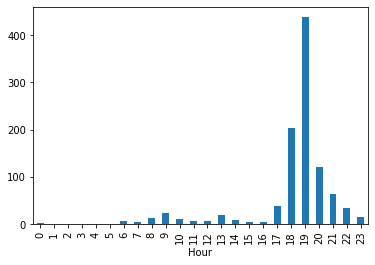

In [252]:
channel_df.groupby('Hour')['Reading'].mean().plot.bar()

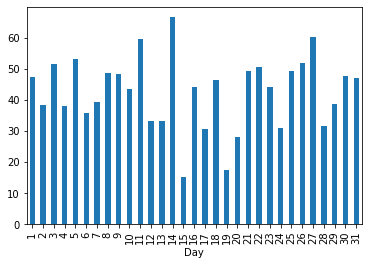

In [253]:
channel_df.groupby('Day')['Reading'].mean().plot.bar()

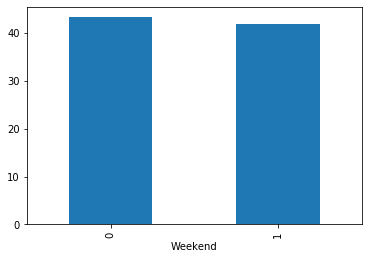

In [254]:
channel_df.groupby('Weekend')['Reading'].mean().plot.bar()

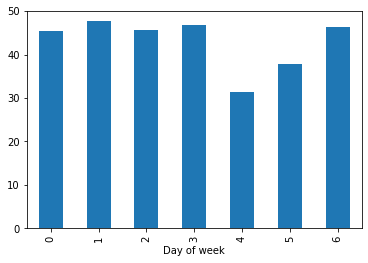

In [255]:
channel_df.groupby('Day of week')['Reading'].mean().plot.bar()

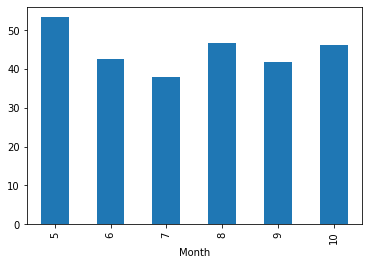

In [256]:
channel_df.groupby('Month')['Reading'].mean().plot.bar()

In [257]:
channel_df_copy = channel_df.copy()

channel_df_copy.Timestamp = pd.to_datetime(channel_df_copy.Timestamp, format = '%d-%m-%y %H:%M')
channel_df_copy.index = channel_df_copy.Timestamp

#Hourly
hourly = channel_df_copy.resample('H').mean()

#Daily
daily = channel_df_copy.resample('D').mean()

#Weekly
weekly = channel_df_copy.resample('W').mean()

#Monthly
monthly = channel_df_copy.resample('M').mean()

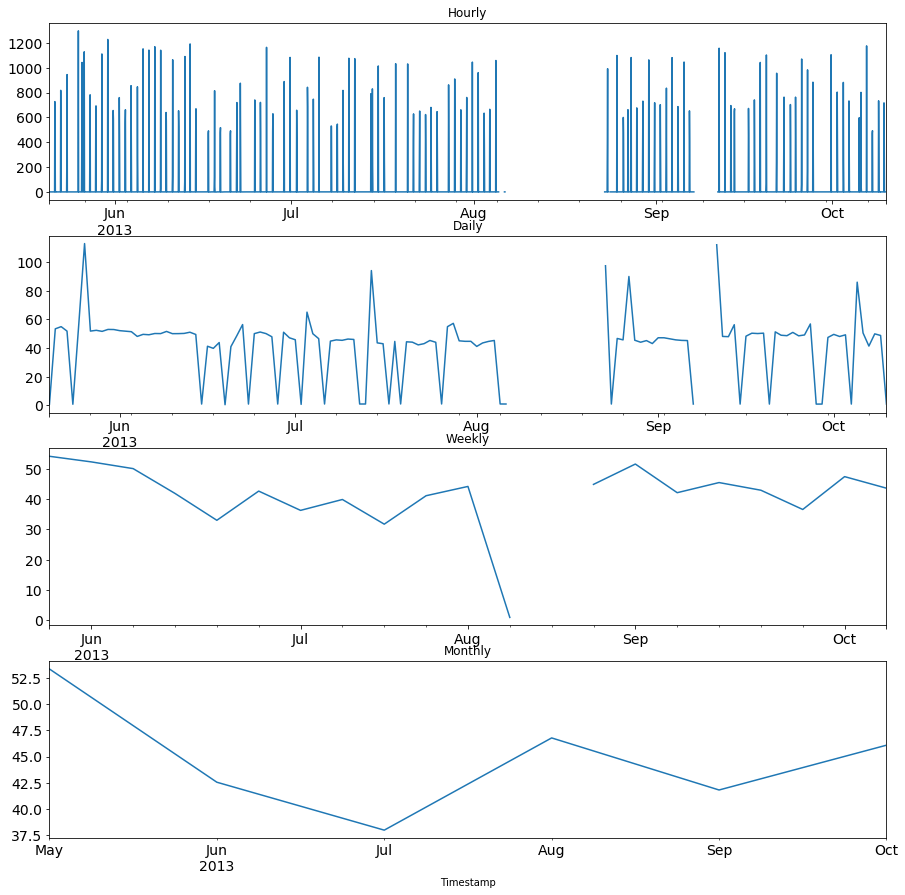

In [258]:
fig,axs = plt.subplots(4,1)

fig_length = 15
fig_height = 15
font_size = 14

hourly.Reading.plot(figsize = (fig_length,fig_height), title = "Hourly", fontsize = font_size, ax = axs[0])
daily.Reading.plot(figsize = (fig_length,fig_height), title = "Daily", fontsize = font_size, ax = axs[1])
weekly.Reading.plot(figsize = (fig_length,fig_height), title = "Weekly", fontsize = font_size, ax = axs[2])
monthly.Reading.plot(figsize = (fig_length,fig_height), title = "Monthly", fontsize = font_size, ax = axs[3])

In [51]:
# h3_c2.groupby(['Month','Day']).size().reset_index().rename(columns={0:'count'})

In [27]:
train = h3_c2[h3_c2['Month'] < 4]
test = h3_c2[h3_c2['Month'] == 4]

In [28]:
train.head()

,Timestamp,Reading,Year,Month,Day,Hour,Minute,Second,Day of week,Weekend
0,2013-02-27 12:35:26,1,2013,2,27,12,35,26,2,0
1,2013-02-27 12:35:33,1,2013,2,27,12,35,33,2,0
2,2013-02-27 12:35:39,1,2013,2,27,12,35,39,2,0
3,2013-02-27 12:35:45,1,2013,2,27,12,35,45,2,0
4,2013-02-27 12:35:51,1,2013,2,27,12,35,51,2,0


In [29]:
test.head()

,Timestamp,Reading,Year,Month,Day,Hour,Minute,Second,Day of week,Weekend
442684,2013-04-01 00:00:00,1,2013,4,1,0,0,0,0,0
442685,2013-04-01 00:00:07,1,2013,4,1,0,0,7,0,0
442686,2013-04-01 00:00:13,1,2013,4,1,0,0,13,0,0
442687,2013-04-01 00:00:19,1,2013,4,1,0,0,19,0,0
442688,2013-04-01 00:00:25,1,2013,4,1,0,0,25,0,0


In [30]:
test_copy = test.copy()

In [31]:
# def predict_reading(test, train):
    

In [32]:
test_copy['predicted'] = test.apply(lambda row : get_avg_reading(row), axis = 1)

In [33]:
test_copy.head()

,Timestamp,Reading,Year,Month,Day,Hour,Minute,Second,Day of week,Weekend,predicted
442684,2013-04-01 00:00:00,1,2013,4,1,0,0,0,0,0,0.931034
442685,2013-04-01 00:00:07,1,2013,4,1,0,0,7,0,0,0.931034
442686,2013-04-01 00:00:13,1,2013,4,1,0,0,13,0,0,0.931034
442687,2013-04-01 00:00:19,1,2013,4,1,0,0,19,0,0,0.931034
442688,2013-04-01 00:00:25,1,2013,4,1,0,0,25,0,0,0.931034


In [34]:
test_copy[1040:1050]['Reading']

443724    1
443725    1
443726    1
443727    1
443728    1
443729    1
443730    1
443731    1
443732    1
443733    1
Name: Reading, dtype: int64

In [35]:
test_copy[1041:1051]['predicted']

443725    81.602151
443726    81.602151
443727    81.602151
443728    81.602151
443729    81.602151
443730    81.602151
443731    81.602151
443732    81.602151
443733    81.602151
443734    81.602151
Name: predicted, dtype: float64

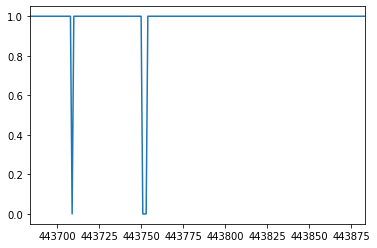

In [36]:
test_copy[1000:1200]['Reading'].plot()

In [37]:
test_copy.shape

(73160, 11)

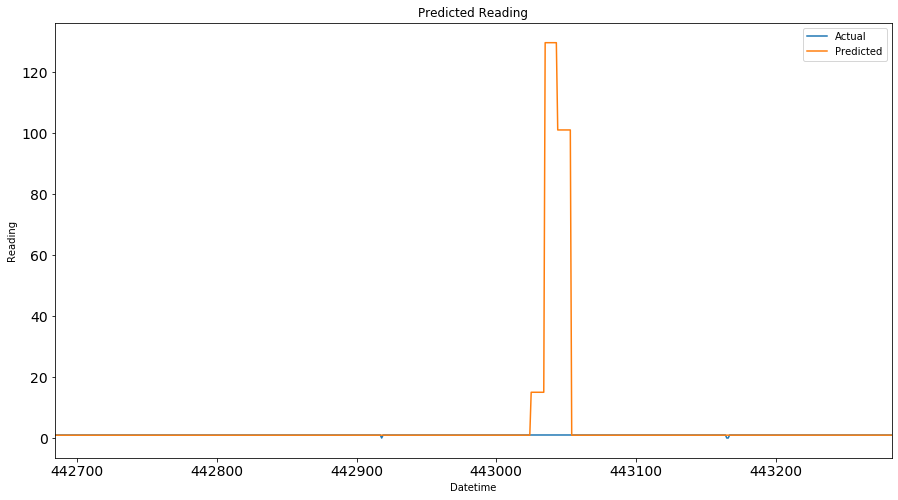

In [38]:
test_copy[0:600]['Reading'].plot(figsize = (15,8), title = 'Test Reading', fontsize = 14, label = 'Actual')
test_copy[0:600]['predicted'].plot(figsize = (15,8), title = 'Predicted Reading', fontsize =14, label = 'Predicted')
plt.xlabel('Datetime')
plt.ylabel('Reading')
plt.legend(loc = 'best')

### RMSE for simple average approach

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_copy['Reading'], test_copy['predicted']))
rmse

212.66398748148288

In [ ]:
{
    '00:00:00':
    {
        'channel_1': 7.77,
        'channel_2': 9.33,
        .
        .
        .
        
    },
    '00:30:00':
    {
        'channel_1': 7.77,
        'channel_2': 9.33,
        .
        .
        .
        
    },
    '00:30:00':
    {
        'channel_1': 7.77,
        'channel_2': 9.33,
        .
        .
        .
        
    },
    '00:30:00':
    {
        'channel_1': 7.77,
        'channel_2': 9.33,
        .
        .
        .
        
    },
    '00:30:00':
    {
        'channel_1': 7.77,
        'channel_2': 9.33,
        .
        .
        .
        
    }
}

In [23]:
# dataframe( list1, list2)

In [ ]:
list_1 = big_dict['00:00:00'].keys()
list_2 = big_dict['00:00:00'].values()

In [ ]:
rersult_00:00:00 = pd.DataFrame({"channel" : list_1, "Reading":list_2})